In [45]:
import torch
import numpy as np

## 3.1 Автоматическое дифференцирование в `torch`

3.1.1 Воспользовавшись классами `Neuron` и `SquaredLoss` из задачи 2.4.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать стохастический градиетный спуск.

In [46]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [47]:
class Neuron:
    """Класс нейрона"""
    def __init__(self, n_inputs):        
        #Атрибут weights
        self.W = torch.randn(n_inputs)
        #Атрибут bias
        self.B = torch.randn(1)    
  
    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.W.T) + self.B
      
    def backward(self, dvalue):
         
        self.dweights = dvalue * self.inputs
        self.dinput =  dvalue * self.W
        self.dbias = dvalue 
        
        # Возвращаем градиент весов и смещения
        return self.dweights, self.dbias

In [48]:
class SquaredLoss:    
    """Функция потерь"""
    def forward(self, y_pred, y_true):
        self.y_pred = torch.tensor(y_pred, requires_grad=True)
        y_true = torch.tensor(y_true)
        z = (self.y_pred - y_true) ** 2
        self.z = z
        return z

    def backward(self):
        self.z.backward()
        self.dinput = self.y_pred.grad

In [49]:
# <размерность элемента выборки >
n_inputs = 4
# скорость обучения
learning_rate = 0.01
# количество эпох
n_epoch = 50
#размер пакета
batch_size = 10

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(n_epoch):
    sample = torch.randint(0, X.shape[0], size=(batch_size,))
    for x_example, y_example in zip(X[sample], y[sample]):
        
        
        # Активация
        y_pred = neuron.forward(x_example)
        curr_loss = loss.forward(y_pred, y_example)
        losses.append(curr_loss)

        # Обратное распространение
        loss.backward()
        dweights, dbias = neuron.backward(loss.dinput)

        # Обновление вестов
        neuron.W -= learning_rate * dweights
        neuron.B -= learning_rate * dbias
        print(f"Epoch {epoch} loss -> {curr_loss[0]}")

<ipython-input-48-97f38f7387e6>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y_pred = torch.tensor(y_pred, requires_grad=True)
<ipython-input-48-97f38f7387e6>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true)


Epoch 0 loss -> 77867.9921875
Epoch 0 loss -> 45462.69921875
Epoch 0 loss -> 19075.654296875
Epoch 0 loss -> 1203.22021484375
Epoch 0 loss -> 11434.77734375
Epoch 0 loss -> 46.673587799072266
Epoch 0 loss -> 32987.4140625
Epoch 0 loss -> 42109.25390625
Epoch 0 loss -> 15166.1875
Epoch 0 loss -> 2675.65869140625
Epoch 1 loss -> 1242.05322265625
Epoch 1 loss -> 2897.7158203125
Epoch 1 loss -> 3658.207275390625
Epoch 1 loss -> 7356.93994140625
Epoch 1 loss -> 722.6055908203125
Epoch 1 loss -> 314.6275329589844
Epoch 1 loss -> 97278.3125
Epoch 1 loss -> 1982.1163330078125
Epoch 1 loss -> 13138.35546875
Epoch 1 loss -> 12109.861328125
Epoch 2 loss -> 2762.3076171875
Epoch 2 loss -> 5214.115234375
Epoch 2 loss -> 0.5925835371017456
Epoch 2 loss -> 287.7566223144531
Epoch 2 loss -> 5625.26416015625
Epoch 2 loss -> 848.1453247070312
Epoch 2 loss -> 15843.0595703125
Epoch 2 loss -> 899.9755249023438
Epoch 2 loss -> 730.2890625
Epoch 2 loss -> 340.3201904296875
Epoch 3 loss -> 6916.43505859375
E

3.1.2 Воспользовавшись классами `Linear` и `MSELoss` из задачи 2.1.4 и 2.3.1, `ReLU` из 2.2.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать пакетный градиентный спуск. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [50]:
X = torch.FloatTensor(torch.linspace(0, 1, 100).view(-1, 1))
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

In [51]:
class ReLU:
    def forward(self, inputs):
        inputs[inputs < 0] = 0
        return inputs

In [52]:
class MSELoss:
    """
    MSELoss - это самый просто лосс, формула которого (output-target) ** 2/n . MSELoss решает проблемы регрессии.
    """
    def backward(self):
        self.z.backward()
        self.dinput = self.y_pred.grad

    def forward(self, y_pred, y_true):
        self.y_pred = torch.tensor(y_pred, requires_grad=True)
        y_true = torch.tensor(y_true)
        z = ((self.y_pred - y_true) ** 2).mean()
        self.z = z
        return z

In [53]:
class Linear:
    
    """Линейная регрессия"""
    
    def __init__(self, n_features, n_neurons):
        self.weights = torch.randn(n_features, n_neurons)
        self.biases = torch.randn(n_neurons)
        
    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues)
        self.dbiases = torch.sum(dvalues, axis=0)
        self.dinputs = torch.matmul(dvalues, self.weights.T)
        return self.dweights, self.dbiases
    
    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases

In [54]:
# <размерность элемента выборки >
n_inputs = 1
#  скорость обучения
learning_rate = 0.01
#  количество эпох
n_epoch = 500

neuron = Linear(1, 1)
loss = MSELoss()
activation = ReLU()

losses = []
for epoch in range(n_epoch):
    y_pred = activation.forward(neuron.forward(X))

    curr_loss = loss.forward(y_pred, y)
    #print(loss.z)
    losses.append(curr_loss)

    # backward pass
    loss.backward()
    dweights, dbias = neuron.backward(loss.dinput)
    #print(loss.dinput)

    # update weights
    neuron.weights -= learning_rate * dweights
    neuron.biases -= learning_rate * dbias
    print(f"Epoch {epoch} loss: {curr_loss}")

Epoch 0 loss: 0.4986480474472046
Epoch 1 loss: 0.4986480474472046
Epoch 2 loss: 0.4986480474472046
Epoch 3 loss: 0.4986480474472046
Epoch 4 loss: 0.4986480474472046
Epoch 5 loss: 0.4986480474472046
Epoch 6 loss: 0.4986480474472046
Epoch 7 loss: 0.4986480474472046
Epoch 8 loss: 0.4986480474472046
Epoch 9 loss: 0.4986480474472046
Epoch 10 loss: 0.4986480474472046
Epoch 11 loss: 0.4986480474472046
Epoch 12 loss: 0.4986480474472046
Epoch 13 loss: 0.4986480474472046
Epoch 14 loss: 0.4986480474472046
Epoch 15 loss: 0.4986480474472046
Epoch 16 loss: 0.4986480474472046
Epoch 17 loss: 0.4986480474472046
Epoch 18 loss: 0.4986480474472046
Epoch 19 loss: 0.4986480474472046
Epoch 20 loss: 0.4986480474472046
Epoch 21 loss: 0.4986480474472046
Epoch 22 loss: 0.4986480474472046
Epoch 23 loss: 0.4986480474472046
Epoch 24 loss: 0.4986480474472046
Epoch 25 loss: 0.4986480474472046
Epoch 26 loss: 0.4986480474472046
Epoch 27 loss: 0.4986480474472046
Epoch 28 loss: 0.4986480474472046
Epoch 29 loss: 0.4986480

<ipython-input-52-e790bcbd3284>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y_pred = torch.tensor(y_pred, requires_grad=True)
<ipython-input-52-e790bcbd3284>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true)


Epoch 102 loss: 0.4986480474472046
Epoch 103 loss: 0.4986480474472046
Epoch 104 loss: 0.4986480474472046
Epoch 105 loss: 0.4986480474472046
Epoch 106 loss: 0.4986480474472046
Epoch 107 loss: 0.4986480474472046
Epoch 108 loss: 0.4986480474472046
Epoch 109 loss: 0.4986480474472046
Epoch 110 loss: 0.4986480474472046
Epoch 111 loss: 0.4986480474472046
Epoch 112 loss: 0.4986480474472046
Epoch 113 loss: 0.4986480474472046
Epoch 114 loss: 0.4986480474472046
Epoch 115 loss: 0.4986480474472046
Epoch 116 loss: 0.4986480474472046
Epoch 117 loss: 0.4986480474472046
Epoch 118 loss: 0.4986480474472046
Epoch 119 loss: 0.4986480474472046
Epoch 120 loss: 0.4986480474472046
Epoch 121 loss: 0.4986480474472046
Epoch 122 loss: 0.4986480474472046
Epoch 123 loss: 0.4986480474472046
Epoch 124 loss: 0.4986480474472046
Epoch 125 loss: 0.4986480474472046
Epoch 126 loss: 0.4986480474472046
Epoch 127 loss: 0.4986480474472046
Epoch 128 loss: 0.4986480474472046
Epoch 129 loss: 0.4986480474472046
Epoch 130 loss: 0.49

## 3.2 Алгоритмы оптимизации в `torch.optim`

In [55]:
import torch.optim as optim

3.2.1 Решить задачу 3.1.1, воспользовавшись оптимизатором `optim.SDG` для применения стохастического градиентого спуска

In [56]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [57]:
class Neuron:
    def __init__(self, n_inputs):
        # <создать атрибуты объекта weights и bias>
        # Создаем случайные веса и смещение нужных размерностей
        self.W = torch.nn.Parameter(torch.randn(1, n_inputs, requires_grad=True))
        self.B = torch.nn.Parameter(torch.randn(1, requires_grad=True))
      
    def parameters(self):
        yield self.W
        yield self.B
  
    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.W.T) + self.B
      
    def backward(self, dvalue):
        with torch.no_grad():
            self.dweights = dvalue * self.inputs
            self.dinput =  dvalue * self.W
            self.dbias = dvalue 
        
        # Возвращаем градиент весов и смещения
        return self.dweights, self.dbias

In [58]:
class SquaredLoss:
    def forward(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        self.loss = (y_pred - y_true)**2
        return self.loss

    def backward(self):
        y_pred = torch.autograd.Variable(self.y_pred, requires_grad=True)
        y_true = torch.autograd.Variable(self.y_true, requires_grad=False)
        ((y_pred - y_true)**2).backward()
        self.dinput = y_pred.grad

In [59]:
# <размерность элемента выборки >
n_inputs = 4
#  скорость обучения
learning_rate = 0.0001
n_epoch = 500 #  количество эпох
batch_size = 10

neuron = Neuron(n_inputs)
optimizer = optim.SGD(neuron.parameters(), lr=learning_rate)
# print(optimizer.param_groups)
loss = SquaredLoss()

losses = []
for epoch in range(n_epoch):
    for x_example, y_example in zip(X, y):
        optimizer.zero_grad()
        # forward pass
        y_pred = neuron.forward(x_example)
        curr_loss = loss.forward(y_pred, y_example)
        losses.append(curr_loss)

        # backward pass
        optimizer = torch.optim.SGD(neuron.parameters(), learning_rate)
        optimizer.zero_grad()
        loss.forward(y_pred, y_example).backward()
        optimizer.step()
    
    print(f"Epoch {epoch} loss: {curr_loss[0]}")

Epoch 0 loss: 32565.76953125
Epoch 1 loss: 31323.447265625
Epoch 2 loss: 30129.65234375
Epoch 3 loss: 28982.443359375
Epoch 4 loss: 27879.970703125
Epoch 5 loss: 26820.4453125
Epoch 6 loss: 25802.16015625
Epoch 7 loss: 24823.470703125
Epoch 8 loss: 23882.806640625
Epoch 9 loss: 22978.658203125
Epoch 10 loss: 22109.5703125
Epoch 11 loss: 21274.15625
Epoch 12 loss: 20471.083984375
Epoch 13 loss: 19699.0703125
Epoch 14 loss: 18956.888671875
Epoch 15 loss: 18243.36328125
Epoch 16 loss: 17557.349609375
Epoch 17 loss: 16897.775390625
Epoch 18 loss: 16263.5927734375
Epoch 19 loss: 15653.80078125
Epoch 20 loss: 15067.4462890625
Epoch 21 loss: 14503.599609375
Epoch 22 loss: 13961.384765625
Epoch 23 loss: 13439.94140625
Epoch 24 loss: 12938.466796875
Epoch 25 loss: 12456.1669921875
Epoch 26 loss: 11992.2998046875
Epoch 27 loss: 11546.1474609375
Epoch 28 loss: 11117.0
Epoch 29 loss: 10704.2197265625
Epoch 30 loss: 10307.1494140625
Epoch 31 loss: 9925.181640625
Epoch 32 loss: 9557.732421875
Epoch 

3.2.2 Решить задачу 3.1.2, воспользовавшись оптимизатором `optim.Adam` для применения пакетного градиентого спуска. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [60]:
X = torch.FloatTensor(torch.linspace(0, 1, 100).view(-1, 1))
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

In [61]:
class ReLU:
    def forward(self, inputs):
        inputs[inputs < 0] = 0
        return inputs

In [62]:
class MSELoss:
    def forward(self, y_pred, y_true):
        self.loss = ((y_pred - y_true)**2).mean()
        return self.loss

    def backward(self, y_pred, y_true):
        y_pred = torch.autograd.Variable(y_pred, requires_grad=True)
        y_true = torch.autograd.Variable(y_true, requires_grad=False)
        (((y_pred - y_true)**2).mean()).backward()
        self.dinput = y_pred.grad

In [63]:
class Linear:
    def __init__(self, n_features, n_neurons):
        self.weights = torch.nn.Parameter(torch.randn(n_features, n_neurons), requires_grad=True) 
        self.biases = torch.nn.Parameter(torch.randn(n_neurons), requires_grad=True)
      
    def parameters(self):
        yield self.weights
        yield self.biases
    
    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases
    
    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues)
        self.dbiases = torch.sum(dvalues, axis=0)
        self.dinputs = torch.matmul(dvalues, self.weights.T)
        return self.dweights, self.dbiases

In [64]:
neuron_1 = Linear(1, 100)
neuron_2 = Linear(100, 1)
loss = MSELoss()
activation = ReLU()
optimizer = optim.Adam([{'params': neuron_1.parameters()}, {'params': neuron_2.parameters()}], lr=0.01)

losses = []
for epoch in range(500):
    # forward pass
    y_pred = neuron_2.forward(activation.forward(neuron_1.forward(X)))
    # y_pred = neuron_2.forward(neuron_1.forward(X))
    curr_loss = loss.forward(y_pred, y)
    losses.append(curr_loss)

    # backward pass
    optimizer.zero_grad()
    loss.forward(y_pred, y).backward()
    optimizer.step()
    print(f"Epoch {epoch} loss: {curr_loss}")

Epoch 0 loss: 510.2767639160156
Epoch 1 loss: 455.5447998046875
Epoch 2 loss: 404.377197265625
Epoch 3 loss: 356.7664489746094
Epoch 4 loss: 312.6713562011719
Epoch 5 loss: 272.040283203125
Epoch 6 loss: 234.8047637939453
Epoch 7 loss: 200.88461303710938
Epoch 8 loss: 170.19789123535156
Epoch 9 loss: 142.63714599609375
Epoch 10 loss: 118.09918975830078
Epoch 11 loss: 96.45463562011719
Epoch 12 loss: 77.57599639892578
Epoch 13 loss: 61.316410064697266
Epoch 14 loss: 47.52101516723633
Epoch 15 loss: 36.026580810546875
Epoch 16 loss: 26.656078338623047
Epoch 17 loss: 19.22919464111328
Epoch 18 loss: 13.555279731750488
Epoch 19 loss: 9.437031745910645
Epoch 20 loss: 6.671666145324707
Epoch 21 loss: 5.054286956787109
Epoch 22 loss: 4.380874156951904
Epoch 23 loss: 4.451577663421631
Epoch 24 loss: 5.074786186218262
Epoch 25 loss: 6.071114540100098
Epoch 26 loss: 7.278163433074951
Epoch 27 loss: 8.553799629211426
Epoch 28 loss: 9.778411865234375
Epoch 29 loss: 10.857965469360352
Epoch 30 loss

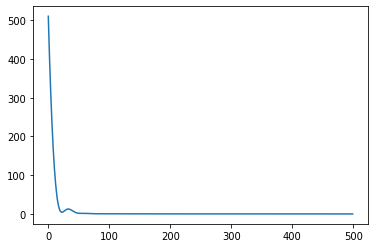

In [65]:
import matplotlib.pyplot as plt

with torch.no_grad():
    plt.plot(losses)

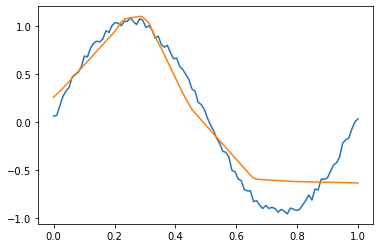

In [66]:
import matplotlib.pyplot as plt

with torch.no_grad():
    plt.plot(X, y)
    plt.plot(X, neuron_2.forward(activation.forward(neuron_1.forward(X))))

## 3.3 Построение сетей при помощи `torch.nn`

In [67]:
import torch.nn as nn

3.3.1 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде класса - наследника `nn.Module`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

In [68]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

In [69]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

neuron = SineNet(3)
optimizer = optim.Adam(neuron.parameters(), lr=0.01)
loss = torch.nn.MSELoss()

for epoch in range(2000):
    optimizer.zero_grad()

    y_pred = neuron.forward(X)
    loss_val = loss(y_pred, y)

    loss_val.backward()

    optimizer.step()
    
    if epoch % 100 == 0: print(f"Epoch {epoch} loss: {loss_val}")

Epoch 0 loss: 0.5255182385444641
Epoch 100 loss: 0.3011879026889801
Epoch 200 loss: 0.19568783044815063
Epoch 300 loss: 0.18882101774215698
Epoch 400 loss: 0.18447914719581604
Epoch 500 loss: 0.1798713058233261
Epoch 600 loss: 0.17351046204566956
Epoch 700 loss: 0.1635977029800415
Epoch 800 loss: 0.1476832628250122
Epoch 900 loss: 0.12290956825017929
Epoch 1000 loss: 0.090749092400074
Epoch 1100 loss: 0.057560764253139496
Epoch 1200 loss: 0.03366099298000336
Epoch 1300 loss: 0.020951665937900543
Epoch 1400 loss: 0.014712627977132797
Epoch 1500 loss: 0.011227095499634743
Epoch 1600 loss: 0.00897987000644207
Epoch 1700 loss: 0.007458603009581566
Epoch 1800 loss: 0.00639308849349618
Epoch 1900 loss: 0.005581664852797985


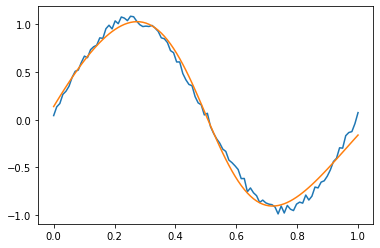

In [70]:
with torch.no_grad():
    plt.plot(X, y)
    plt.plot(X, neuron(X))

3.3.2 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде объекта `nn.Sequential`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

In [71]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

layers = [
    torch.nn.Linear(1, 5),
    torch.nn.Sigmoid(),
    torch.nn.Linear(5, 1)
]
model = torch.nn.Sequential(*layers)

optimizer = optim.Adam(model.parameters(), lr=0.01)
loss = torch.nn.MSELoss()

for epoch in range(2000):
    optimizer.zero_grad()

    y_pred = model.forward(X)
    loss_val = loss(y_pred, y)

    loss_val.backward()

    optimizer.step()
    
    if epoch % 100 == 0: print(f"Epoch {epoch} loss: {loss_val}")

Epoch 0 loss: 0.5020621418952942
Epoch 100 loss: 0.21188442409038544
Epoch 200 loss: 0.19594742357730865
Epoch 300 loss: 0.19450236856937408
Epoch 400 loss: 0.19226299226284027
Epoch 500 loss: 0.18875256180763245
Epoch 600 loss: 0.18317721784114838
Epoch 700 loss: 0.1742786467075348
Epoch 800 loss: 0.1582636535167694
Epoch 900 loss: 0.12294939905405045
Epoch 1000 loss: 0.06674294918775558
Epoch 1100 loss: 0.025399066507816315
Epoch 1200 loss: 0.009795728139579296
Epoch 1300 loss: 0.006218850612640381
Epoch 1400 loss: 0.004922184161841869
Epoch 1500 loss: 0.003528864122927189
Epoch 1600 loss: 0.002392119960859418
Epoch 1700 loss: 0.0016014297725632787
Epoch 1800 loss: 0.0011376144830137491
Epoch 1900 loss: 0.0009100907482206821


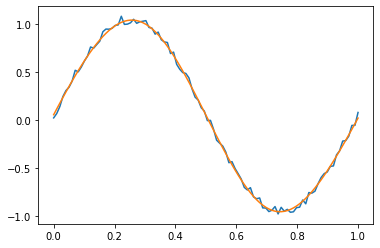

In [72]:
with torch.no_grad():
    plt.plot(X, y)
    plt.plot(X, model(X))

## 3.4. Datasets and dataloaders

In [73]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

3.4.1 Создать датасет, поставляющий данные из задачи 3.1.2. 

Создать `DataLoader` на основе этого датасета и проверить работоспособность.

Воспользовавшись результатами 3.3.1 (или 3.3.2) обучите модель, пользуясь мини-пакетным градиентным спуском с размером пакета (`batch_size`) = 10

In [74]:
class SinDataset(Dataset):
  def __init__(self):
    self.X = torch.linspace(0, 1, 100).view(-1, 1)
    self.y = torch.sin(2 * np.pi * self.X) + 0.1 * torch.rand(self.X.size()) 
    #pass

  def __len__(self):
    return len(self.X)
    #pass

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]
    #pass

3.4.2 Предсказание цен алмазов

3.4.2.1 Создайте датасет на основе файла diamonds.csv. 

1. Удалите все нечисловые столбцы
2. Целевой столбец (`y`) - `price`
3. Преобразуйте данные в тензоры корректных размеров

3.4.2.2 Разбейте датасет на обучающий и тестовый датасет при помощи `torch.utils.data.random_split`.

3.4.2.3 Обучите модель для предсказания цен при помощи мини-пакетного градиентного спуска (`batch_size = 256`). 

3.4.2.4 Выведите график функции потерь в зависимости от номера эпохи (значение потерь для эпохи рассчитывайте как среднее значение ошибок на каждом батче). Проверьте качество модели на тестовой выборке. 


In [75]:
class DiamondsDataset(Dataset):
  def __init__(self, data):
    super().__init__()
    self.data = pd.read_csv(data, index_col = [0])
    #pass

  def __len__(self):
    return len(self.data)
    #pass

  def __getitem__(self, idx):
    self.X = torch.FloatTensor(self.data.select_dtypes(['number']).values)
    self.y = torch.FloatTensor(self.data['price'].values)
    return self.X[idx], self.y[idx]
    #pass

In [76]:
dataset = DiamondsDataset('diamonds.csv')

train, test = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), int(len(dataset)*0.2)])

diamonds_dataloader_train = DataLoader(train, batch_size=256)
diamonds_dataloader_test = DataLoader(test, batch_size=256)

In [77]:
class DiamondsNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons, n_features):
        super(DiamondsNet, self).__init__()
        self.fc1 = torch.nn.Linear(n_hidden_neurons, n_features)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_features, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

neuron = DiamondsNet(7, 49)
optimizer = torch.optim.SGD(neuron.parameters(), lr=0.025)
loss = torch.nn.MSELoss()

loss_vals = []
for epoch in range(20):
    X_new, y_new = next(iter(diamonds_dataloader_train))
    optimizer.zero_grad()

    y_pred = neuron.forward(X_new)
    loss_val = loss(y_pred, y_new)
    loss_vals.append(loss_val)

    loss_val.backward()

    optimizer.step()
    
    print(f"Epoch {epoch} loss: {loss_val}")

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 loss: 33408504.0
Epoch 1 loss: 17196130.0
Epoch 2 loss: 17196130.0
Epoch 3 loss: 17196130.0
Epoch 4 loss: 17196130.0
Epoch 5 loss: 17196130.0
Epoch 6 loss: 17196130.0
Epoch 7 loss: 17196130.0
Epoch 8 loss: 17196130.0
Epoch 9 loss: 17196130.0
Epoch 10 loss: 17196130.0
Epoch 11 loss: 17196130.0
Epoch 12 loss: 17196130.0
Epoch 13 loss: 17196130.0
Epoch 14 loss: 17196130.0
Epoch 15 loss: 17196130.0
Epoch 16 loss: 17196130.0
Epoch 17 loss: 17196130.0
Epoch 18 loss: 17196130.0
Epoch 19 loss: 17196130.0


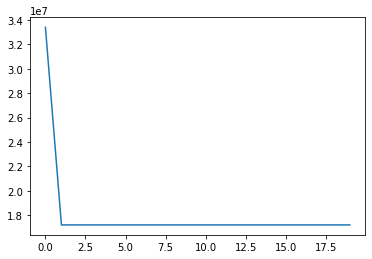

In [78]:
import matplotlib.pyplot as plt

with torch.no_grad():
    plt.plot(loss_vals)

3.4.3 Модифицируйте метод `__init__` датасета из 3.4.2 таким образом, чтобы он мог принимать параметр `transform: callable`. Реализуйте класс `DropColsTransform` для удаления нечисловых данных из массива. Реализуйте класс `ToTensorTransorm` для трансформации массива в тензор.

In [86]:
class DiamondsDataset(Dataset):
  def __init__(self, data, transform=None):
    self.data = pd.read_csv(data, index_col = [0])
    self.transform = transform

  def __len__(self):
    return len(self.data)
    #pass

  def __getitem__(self, idx):
    X = self.data.drop('price', axis=1)
    y = self.data['price']
    sample = X.iloc[idx], y.iloc[idx]
    if self.transform:
      sample = self.transform(sample)
    return sample

In [87]:
class DropColsTransform:
  def __init__(self, drop):
    self.drop = drop
    #pass
  
  def __call__(self, sample):
    X, y = sample
    # <удаление из X столбцов self.drop>
    X = X.drop(X.index[self.drop], axis=0)
    return X, y

In [88]:
class ToTensorTransform:
  def __call__(self, sample):
    X, y = sample
    # <преобразование X и y в тензоры>
    X = torch.FloatTensor(X.astype('float64').values)
    y = torch.FloatTensor([y])
    return X, y

In [89]:
from torchvision import transforms

drop = DropColsTransform(drop=[1, 2, 3])
to_tensor = ToTensorTransform()
dataset = DiamondsDataset('diamonds.csv', transform=transforms.Compose([drop, to_tensor]))


In [90]:
train, test = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), int(len(dataset)*0.2)])

diamonds_dataloader_train = DataLoader(train, batch_size=256)
diamonds_dataloader_test = DataLoader(test, batch_size=256)

In [91]:
class DiamondsNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons, n_features):
        super(DiamondsNet, self).__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Linear(n_features, n_hidden_neurons), 
            torch.nn.Sigmoid(), 
            torch.nn.Linear(n_hidden_neurons,n_hidden_neurons),
            torch.nn.Sigmoid(),
            torch.nn.Linear(n_hidden_neurons,n_hidden_neurons*2),
            torch.nn.Sigmoid(),
            torch.nn.Linear(n_hidden_neurons*2,1)
        )

    def forward(self, x):
        x = self.net(x)
        return x

neuron = DiamondsNet(16, 6)
optimizer = torch.optim.SGD(neuron.parameters(), lr=0.01)
loss = torch.nn.MSELoss()

loss_vals = []
for epoch in range(35):
    X_new, y_new = next(iter(diamonds_dataloader_train))
    optimizer.zero_grad()

    y_pred = neuron.forward(X_new)
    loss_val = loss(y_pred, y_new)
    loss_vals.append(loss_val)

    loss_val.backward()

    optimizer.step()

    print(f"Epoch {epoch} loss: {loss_val}")

Epoch 0 loss: 27488948.0
Epoch 1 loss: 22352088.0
Epoch 2 loss: 16152399.0
Epoch 3 loss: 14754689.0
Epoch 4 loss: 14531059.0
Epoch 5 loss: 14495279.0
Epoch 6 loss: 14489555.0
Epoch 7 loss: 14488638.0
Epoch 8 loss: 14488491.0
Epoch 9 loss: 14488468.0
Epoch 10 loss: 14488465.0
Epoch 11 loss: 14488464.0
Epoch 12 loss: 14488464.0
Epoch 13 loss: 14488465.0
Epoch 14 loss: 14488464.0
Epoch 15 loss: 14488465.0
Epoch 16 loss: 14488465.0
Epoch 17 loss: 14488463.0
Epoch 18 loss: 14488463.0
Epoch 19 loss: 14488463.0
Epoch 20 loss: 14488463.0
Epoch 21 loss: 14488463.0
Epoch 22 loss: 14488463.0
Epoch 23 loss: 14488463.0
Epoch 24 loss: 14488463.0
Epoch 25 loss: 14488463.0
Epoch 26 loss: 14488463.0
Epoch 27 loss: 14488463.0
Epoch 28 loss: 14488463.0
Epoch 29 loss: 14488463.0
Epoch 30 loss: 14488463.0
Epoch 31 loss: 14488463.0
Epoch 32 loss: 14488463.0
Epoch 33 loss: 14488463.0
Epoch 34 loss: 14488463.0


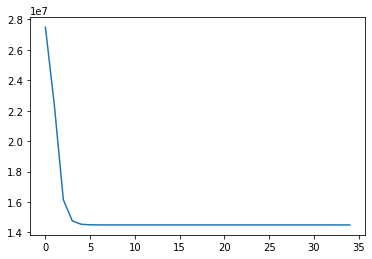

In [92]:
with torch.no_grad():
    plt.plot(loss_vals)